  Vehicle Make Vehicle Model Fuel Type  Engine Size (L) Transmission Type  \
0       Toyota       Corolla  Gasoline              1.8         Automatic   
1         Ford         F-150  Gasoline              3.5         Automatic   
2        Honda         Civic  Gasoline              2.0            Manual   
3       Yamaha        YZF-R1  Gasoline              1.0            Manual   
4          BMW      3 Series  Gasoline              2.5         Automatic   

  Vehicle Type  
0          Car  
1        Truck  
2          Car  
3   Motorcycle  
4          Car  
Accuracy: 0.80%
Confusion Matrix:
[[5 0 2]
 [0 5 0]
 [1 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      1.00      1.00         5
           2       0.50      0.67      0.57         3

    accuracy                           0.80        15
   macro avg       0.78      0.79      0.78        15
weighted avg       0.82

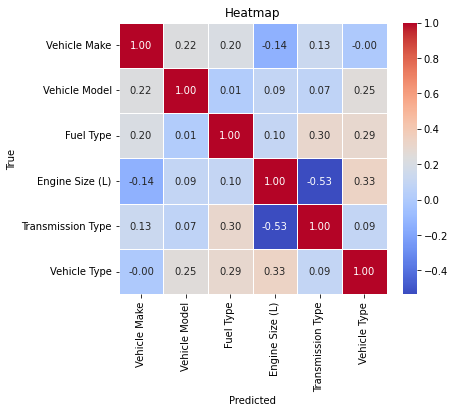

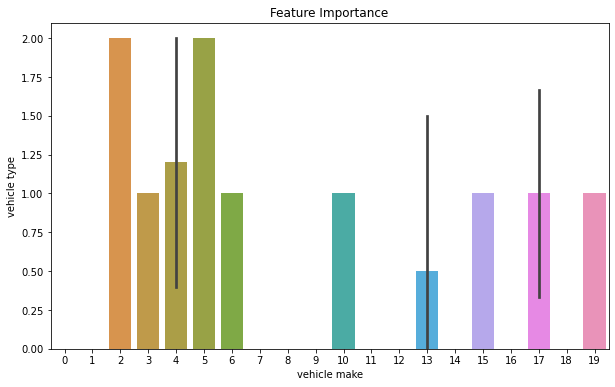

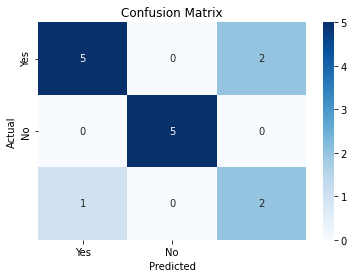

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
data = pd.read_csv('vehicle.csv')  # Assuming the dataset is stored in 'vehicle_data.csv'

# Show the first few rows of the dataset
print(data.head())

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'Vehicle Make', 'Vehicle Model', 'Fuel Type', and 'Transmission Type'
data['Vehicle Make'] = label_encoder.fit_transform(data['Vehicle Make'])
data['Vehicle Model'] = label_encoder.fit_transform(data['Vehicle Model'])
data['Fuel Type'] = label_encoder.fit_transform(data['Fuel Type'])
data['Transmission Type'] = label_encoder.fit_transform(data['Transmission Type'])
data['Vehicle Type'] = label_encoder.fit_transform(data['Vehicle Type'])

# Splitting the dataset into features and target variable
X = data.drop('Vehicle Type', axis=1)  # Features
y = data['Vehicle Type']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')


# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


classification_report=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report)


plt.figure(figsize=(6, 5))
correlation=data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=data['Vehicle Make'], y=data['Vehicle Type'])
plt.title('Feature Importance')
plt.xlabel('vehicle make')
plt.ylabel('vehicle type')
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



